In [ ]:
## Notebook env: mirtud_env (R kernel)
## This notebook quantifies the correlation between miR exp level in MDAMB231 and 
## the observed global txn effect upon knockdown of those miRs in mir_tud expt in MDAMB231

## We expect high expressing miRs to see a larger txn effect upon knockdown

In [90]:
library(stringr)
library(dplyr)
library(ggplot2)

In [54]:
## mir_tud data loading
mir_tud_edist_sep_controls = read.csv('/home/ssobti/projects/mir_tud/output_data/edist/updated_inputs/miR_etest_df_separate_controls.csv')
mir_tud_edist_one_control = read.csv('/home/ssobti/projects/mir_tud/output_data/edist/updated_inputs/miR_etest_df_combined_controls.csv')

In [55]:
colnames(mir_tud_edist_sep_controls)[1] = 'miR'
colnames(mir_tud_edist_one_control)[1] = 'miR'

In [56]:
## Loading miR expression levels (from lab's MDAMB231 miR expression sequencing)
MDAMB231_1_miRexp = read.csv('/home/ssobti/projects/mir_tud/MDAMB231_smRNA_seq/MDA231_1.cnt', sep = '\t', header = FALSE)
MDAMB231_2_miRexp = read.csv('/home/ssobti/projects/mir_tud/MDAMB231_smRNA_seq/MDA231_2.cnt', sep = '\t', header = FALSE)

In [57]:
colnames(MDAMB231_1_miRexp) = c('miR', 'count')
colnames(MDAMB231_2_miRexp) = c('miR', 'count')

In [58]:
MDAMB231_1_miRexp_filtered = MDAMB231_1_miRexp[startsWith(MDAMB231_1_miRexp$miR, 'hsa-'),]
MDAMB231_2_miRexp_filtered = MDAMB231_2_miRexp[startsWith(MDAMB231_2_miRexp$miR, 'hsa-'),]

In [59]:
MDAMB231_1_miRexp_filtered

,miR,count
,<chr>,<int>
128,hsa-let-7a-1,5894
129,hsa-let-7a-2,5609
130,hsa-let-7a-3,5785
131,hsa-let-7b,2014
132,hsa-let-7c,620
133,hsa-let-7d,3851
134,hsa-let-7e,1890
135,hsa-let-7f-1,3723
136,hsa-let-7f-2,4005


In [60]:
mirtud_miRs_sep = mir_tud_edist_sep_controls$miR %>% str_remove('-5p') %>% str_remove('-3p') %>% str_remove('hsa-') %>% str_replace(pattern = 'miR', replacement = 'mir')
mirtud_miRs_one = mir_tud_edist_one_control$miR %>% str_remove('-5p') %>% str_remove('-3p') %>% str_remove('hsa-') %>% str_replace(pattern = 'miR', replacement = 'mir')


In [61]:
mir_tud_edist_sep_controls$miR = mirtud_miRs_sep
mir_tud_edist_one_control$miR = mirtud_miRs_one

In [62]:
MDAMB231_1_miRs = str_remove(MDAMB231_1_miRexp_filtered$miR, 'hsa-')

In [63]:
intersect(mirtud_miRs_sep, MDAMB231_1_miRs)

[1] "let-7i"     "mir-100"    "mir-106b"   "mir-10a"    "mir-1180"  
  [6] "mir-122"    "mir-1226"   "mir-1246"   "mir-1248"   "mir-125a"  
 [11] "mir-125b-1" "mir-126"    "mir-1267"   "mir-128-1"  "mir-1284"  
 [16] "mir-1287"   "mir-1292"   "mir-1294"   "mir-1296"   "mir-1299"  
 [21] "mir-1301"   "mir-1303"   "mir-1304"   "mir-1306"   "mir-1307"  
 [26] "mir-130b"   "mir-132"    "mir-137"    "mir-138-1"  "mir-139"   
 [31] "mir-140"    "mir-143"    "mir-147b"   "mir-148a"   "mir-151"   
 [36] "mir-15b"    "mir-17"     "mir-181a-2" "mir-182"    "mir-183"   
 [41] "mir-185"    "mir-188"    "mir-18a"    "mir-190"    "mir-1908"  
 [46] "mir-191"    "mir-1910"   "mir-193a"   "mir-197"    "mir-205"   
 [51] "mir-20a"    "mir-210"    "mir-2110"   "mir-212"    "mir-22"    
 [56] "mir-222"    "mir-224"    "mir-2277"   "mir-25"     "mir-27a"   
 [61] "mir-27b"    "mir-28"     "mir-29b-1"  "mir-29c"    "mir-3065"  
 [66] "mir-3140"   "mir-3143"   "mir-3173"   "mir-3174"   "mir-3177"  
 [71] "mir-3187"   "mir-32"     "mir-324"    "mir-326"    "mir-328"   
 [76] "mir-330"    "mir-331"    "mir-335"    "mir-339"    "mir-33a"   
 [81] "mir-340"    "mir-342"    "mir-345"    "mir-34b"    "mir-34c"   
 [86] "mir-361"    "mir-374a"   "mir-374b"   "mir-375"    "mir-378"   
 [91] "mir-421"    "mir-423"    "mir-424"    "mir-425"    "mir-450a-2"
 [96] "mir-450b"   "mir-454"    "mir-455"    "mir-486"    "mir-489"   
[101] "mir-491"    "mir-501"    "mir-503"    "mir-505"    "mir-522"   
[106] "mir-532"    "mir-542"    "mir-548p"   "mir-551b"   "mir-556"   
[111] "mir-574"    "mir-576"    "mir-579"    "mir-582"    "mir-584"   
[116] "mir-589"    "mir-590"    "mir-605"    "mir-615"    "mir-624"   
[121] "mir-625"    "mir-628"    "mir-629"    "mir-642"    "mir-651"   
[126] "mir-652"    "mir-653"    "mir-660"    "mir-671"    "mir-744"   
[131] "mir-766"    "mir-769"    "mir-877"    "mir-92a-1"  "mir-92b"   
[136] "mir-93"     "mir-937"    "mir-942"

In [64]:
slash_names = mir_tud_edist_sep_controls$miR[grepl(pattern = '/', x = mir_tud_edist_sep_controls$miR)]

In [65]:
split_names = str_split(slash_names, '/')
split_slash_names = list()
for (i in 1:length(split_names)){
    if (grepl('let', split_names[i])){
        tmp = str_remove(split_names[[i]], 'let-')
        split_slash_names[[i]] = paste0('let-', tmp)
    }else{
        tmp2 = str_remove(split_names[[i]], 'miR-')
        split_slash_names[[i]] = paste0('mir-', tmp2)
    }
}


x = unlist(split_slash_names[which(grepl('1185', split_slash_names))])
split_slash_names[[which(grepl('1185', split_slash_names))]][[which(grepl('1185', x))]] = 'mir-1185-3p'

split_slash_names = lapply(split_slash_names, str_remove, '-5p')
split_slash_names = lapply(split_slash_names, str_remove, '-3p')

split_slash_names_vectorized = unlist(split_slash_names)

In [66]:
intersect(split_slash_names_vectorized, MDAMB231_1_miRs)

[1] "let-7a-2"  "let-7g"    "let-7b"    "let-7f-1"  "let-7f-2"  "mir-1260b"
 [7] "mir-454"   "mir-212"   "mir-200a"  "mir-152"   "mir-195"   "mir-424"  
[13] "mir-497"   "mir-215"   "mir-429"   "mir-32"    "mir-363"   "mir-708"  
[19] "mir-301b"  "mir-362"   "mir-449c"  "mir-500b"  "mir-616"   "mir-769"  
[25] "mir-502"   "mir-548k"  "mir-548b"  "mir-548c"  "mir-548j"  "mir-548o" 
[31] "mir-548w"  "mir-548e"  "mir-1271"  "mir-3187"  "mir-100"

In [67]:
length(intersect(mirtud_miRs_sep, MDAMB231_1_miRs))

[1] 138

In [68]:
length(intersect(c(mirtud_miRs_sep, split_slash_names_vectorized), MDAMB231_1_miRs))

[1] 166

In [69]:
pct_of_mirtud_miR_family_in_cell_line_miRs = vector()
for (i in 1:length(split_slash_names)){
    pct_of_mirtud_miR_family_in_cell_line_miRs[i] = 100*length(which(split_slash_names[[i]] %in% MDAMB231_1_miRs))/length(split_slash_names[[i]])
}

length(which(pct_of_mirtud_miR_family_in_cell_line_miRs == 100))
length(split_slash_names)
length(which(pct_of_mirtud_miR_family_in_cell_line_miRs == 100))/length(split_slash_names)

[1] 1

[1] 50

[1] 0.02

In [70]:
split_slash_names[which(pct_of_mirtud_miR_family_in_cell_line_miRs == 100)]

[[1]]
[1] "let-7a-2" "let-7g"

In [71]:
MDAMB231_1_miRexp_filtered$miR = MDAMB231_1_miRexp_filtered$miR %>% str_remove('hsa-')
MDAMB231_2_miRexp_filtered$miR = MDAMB231_2_miRexp_filtered$miR

In [72]:
mir_tud_edist_sep_controls$miR %>% str_replace_all('-3p', '') %>% str_replace_all('-5p', '') %>% str_replace_all('hsa-', '') 

[1] "mir-10399"                                                                                                                        
  [2] "mir-10399"                                                                                                                        
  [3] "mir-10523"                                                                                                                        
  [4] "mir-10526"                                                                                                                        
  [5] "mir-10527"                                                                                                                        
  [6] "mir-9903"                                                                                                                         
  [7] "let-7a-2/let-7g"                                                                                                                  
  [8] "let-7a/let-7b/let-7f-1/98"                                                                                                        
  [9] "let-7f-2/1185"                                                                                                                    
 [10] "let-7i"                                                                                                                           
 [11] "mir-10"                                                                                                                           
 [12] "mir-100"                                                                                                                          
 [13] "mir-101.1"                                                                                                                        
 [14] "mir-103a-2"                                                                                                                       
 [15] "mir-106b"                                                                                                                         
 [16] "mir-10a"                                                                                                                          
 [17] "mir-1180"                                                                                                                         
 [18] "mir-1180"                                                                                                                         
 [19] "mir-1185"                                                                                                                         
 [20] "mir-122"                                                                                                                          
 [21] "mir-1226"                                                                                                                         
 [22] "mir-1226"                                                                                                                         
 [23] "mir-1246"                                                                                                                         
 [24] "mir-1248"                                                                                                                         
 [25] "mir-125"                                                                                                                          
 [26] "mir-1255a/1255b"                                                                                                                  
 [27] "mir-125a"                                                                                                                         
 [28] "mir-125b-1"                                                                                                                       
 [29] "mir-126"                                                                                                                          


In [73]:
MDAMB231_1_miRexp_filtered$miR <- str_remove(MDAMB231_1_miRexp_filtered$miR, 'hsa-')
MDAMB231_2_miRexp_filtered$miR <- str_remove(MDAMB231_2_miRexp_filtered$miR, 'hsa-')

In [76]:
## remove dupicates because you've done away with any distinction between -5p and -3p miRs
mir_tud_edist_sep_controls = mir_tud_edist_sep_controls[!(duplicated(mir_tud_edist_sep_controls$miR) | duplicated(mir_tud_edist_sep_controls$miR, fromLast = TRUE)),]
mir_tud_edist_one_control = mir_tud_edist_one_control[!(duplicated(mir_tud_edist_one_control$miR) | duplicated(mir_tud_edist_one_control$miR, fromLast = TRUE)),]


In [77]:
rownames(MDAMB231_1_miRexp_filtered) = MDAMB231_1_miRexp_filtered$miR
rownames(MDAMB231_2_miRexp_filtered) = MDAMB231_2_miRexp_filtered$miR
rownames(mir_tud_edist_sep_controls) = mir_tud_edist_sep_controls$miR
rownames(mir_tud_edist_one_control) = mir_tud_edist_one_control$miR


In [84]:
intersecting_miRs_sep_control_MDAMB231_1 = intersect(rownames(mir_tud_edist_sep_controls), rownames(MDAMB231_1_miRexp_filtered))

In [88]:
plot_df = data.frame(miRs = intersecting_miRs_sep_control_MDAMB231_1, expression = MDAMB231_1_miRexp_filtered[intersecting_miRs_sep_control_MDAMB231_1, 'count'], edist = mir_tud_edist_sep_controls[intersecting_miRs_sep_control_MDAMB231_1,'edist'])

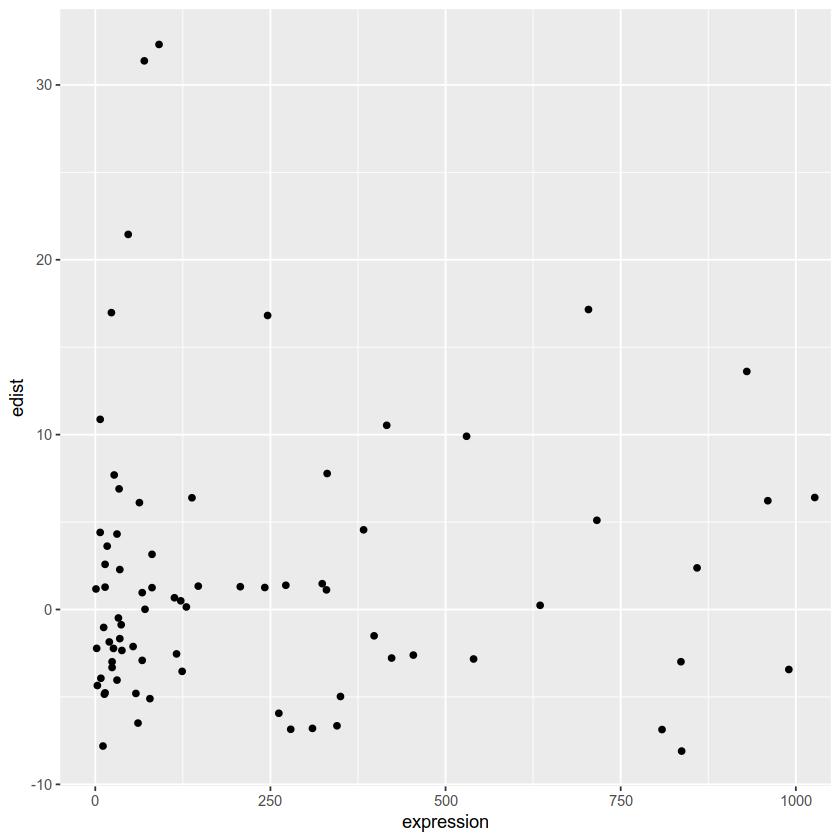

In [94]:
ggplot(plot_df, aes(expression, edist)) + geom_point() + coord_cartesian(xlim = c(0, 1000))